# Topic of Labs

This week's labs will involve some further explorations of topics we have begun in class. 

## Lab 1

 * Build a Python library our of Week 6 Lecture 2 material.  This is a Victoria Police Department crime stats library.  We start with the *vicpd.py* library, which is a collation of everything we did in Week 6, Lecture 2.  
 
 * Use **dir(vicpd)** to list the commands available in the vicpd library, or just load the file and look.
 
 * We continue exploring the VicPD and weather stats, looking to make inferences with the data. 
 

In [1]:
import vicpd as vpd

Loading the VicPD library.
[cdata] 5 years and 150 days of crime data. 86607 records total.
[ctypes] tree structure of crime types
[all_tots] totals for crime types
[all_freq] relative frequencies of crime types
[weekdaycount] loaded
[weekdaypct] loaded
[presentBDWeek] loaded
[wdatlist] 5 years and 177 days of weather data, dict of (max c, min c, mean c, rain mm, snow cm) indexed on date
VicPD library loaded.


**Suggestions**

- Make a variety of plots, of one daily crime count vs another. 

- Look for linear relationships, or perhaps non-linear relationships using least-squares. 

- Look for phenomena you might expect, like high accident counts after freezing rain. 

- If you find such, perhaps plot them spatially.  Do they occur on hills? 

In [2]:
import pprint as pp
pp.pprint(vpd.all_tots)

defaultdict(<class 'int'>,
            {'Alarm': 904,
             'Arson': 182,
             'Assault': 2215,
             'Assault with Deadly Weapon': 1208,
             'Breaking & Entering': 3616,
             'Community Policing': 34,
             'Disorder': 2673,
             'Drugs': 2720,
             'Liquor': 7894,
             'Other': 16515,
             'Property Crime': 5785,
             'Robbery': 544,
             'Theft': 14685,
             'Theft from Vehicle': 6643,
             'Theft of Vehicle': 871,
             'Traffic': 15127,
             'Vehicle Stop': 4318,
             'Weapons Offense': 673,
             ('Alarm', 'FALSE ALARMS'): 904,
             ('Arson', 'ARSON-DISREGARD FOR HUMAN LIFE'): 12,
             ('Arson', 'ARSON-PROPERTY'): 170,
             ('Assault', 'ASSAULT AGAINST POLICE OFFICER'): 300,
             ('Assault', 'ASSAULT-COMMON OR TRESPASS'): 1556,
             ('Assault', 'ASSAULTS-OTHER'): 359,
             ('Assault with Deadly 

In [3]:
print(vpd.weekdaycount( ('Vehicle Stop', 'CYCLIST')  ))

[155, 162, 198, 182, 169, 115, 110]


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


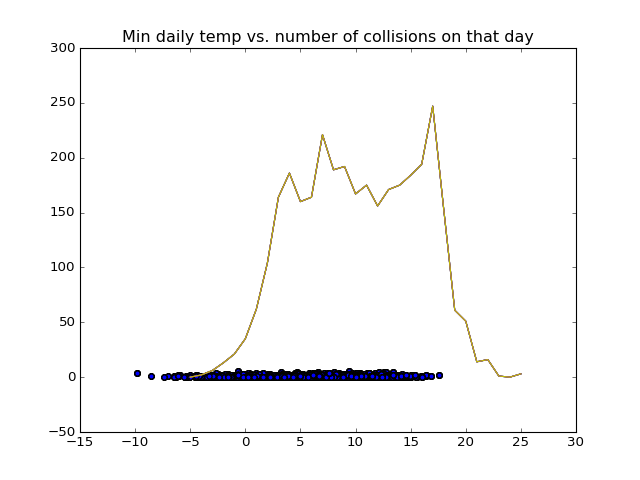

In [4]:
x, y = vpd.xyplot('Traffic', 'COLLISION-DAMAGE UNDER $1000', 1 )
import matplotlib.pyplot as plt
%pylab nbagg
plt.title("Min daily temp vs. number of collisions on that day")
plt.scatter(x,y)

## What we really want to do

**Question** Is look at on day $x$ if it rains, freezes that *night*, is there a disproporionate number of accidents on day $x+1$? 

**Strategy** 

 * Iterate through every day in the weather data. 
 * Look for days with rain, and min temperature < 0. 
 * Check to see if we have the crime data for the **next** day.
 * Count car accidents above and below \$1000. 
 
 * Compare these numbers to normal days. 
 
**Once you have complete this**

 * Do accidents after freezing rain happen on hills?  Intersections? Make a heat map of all the accident locations. 

In [5]:
import datetime as dt
vpd.wdatlist[ dt.date(2016, 1, 16) ]
## weather data Jan 16th, 2016. 
## Max 10.2 c
## Min 4.6 c
## Mean 7.4 c
## 11.8mm rain! 
## 0.0 cm snow.

(10.2, 4.6, 7.4, 11.8, 0.0)

In [6]:
## vpd.wdatlist is dictorary:
## indexed by date
## vpd.wdatlist[date data] = (max c, min c, mean c, rain cm, snow cm)

f_rain_events = []

## iterating the wdatlist dictionary
for dat, wdat in vpd.wdatlist.items():
    ## dat is the date, wdat is wdatlist[dat], i.e. the weather tuple
    if (wdat[1]<0.0) and (wdat[3]>0.0):
        #print("date = ",dat, "weather = ", wdat)
        f_rain_events.append(dat)

print(len(f_rain_events), " freezing rain events.")
sfre = sorted(f_rain_events)
#for x in sfre:
#    print(x)
    

80  freezing rain events.


In [7]:
## Let's look for crime records on f_rain_events day + 1. 
##  for this we need the timedelta object (a difference of dates)
one_day = dt.timedelta(1) ## see time delta docs

hdata = []

tinc_after = []
for x in f_rain_events:
    next_day = x + one_day
    ## let's look for next_day in the crime data. 
    for c in vpd.cdata:
        if (c.incident_datetime.date() == next_day) and\
           (c.parent_incident_type=='Traffic') and\
           ( (c.incident_type_primary=="COLLISION-DAMAGE OVER $1000") or\
             (c.incident_type_primary=="COLLISION-DAMAGE UNDER $1000") or\
             (c.incident_type_primary=='COLLISION-NON-FATAL INJURY')):
            tinc_after.append(c)
            hdata.append( [c.latitude, c.longitude, 0.02] )
print(len(tinc_after), "  ? maybe relevant ? traffic events after freezing rain, on all days.")
print(len(f_rain_events), " total days w/ freezing rain. ")
print("Average of ", len(tinc_after)/len(f_rain_events), " per freezing rain day. " )

## let's compare to "normal days".  Normal will mean, not a freezing rain day. 
## all dates. . .
allothdats = [k+one_day for k in vpd.wdatlist.keys() if (k not in f_rain_events)]
oth_coll = []
oth_hdata = []
print(len(allothdats), " total other days")
for x in allothdats:
    for c in vpd.cdata:
        if (c.incident_datetime.date() == next_day) and\
           (c.parent_incident_type=='Traffic') and\
           ( (c.incident_type_primary=="COLLISION-DAMAGE OVER $1000") or\
             (c.incident_type_primary=="COLLISION-DAMAGE UNDER $1000") or\
             (c.incident_type_primary=='COLLISION-NON-FATAL INJURY')):
            oth_coll.append(c)
            oth_hdata.append( [c.latitude, c.longitude, 0.02] )
print("Average of ", len(oth_coll)/len(allothdats), " per non-freezing rain day. " )

167   ? maybe relevant ? traffic events after freezing rain, on all days.
80  total days w/ freezing rain. 
Average of  2.0875  per freezing rain day. 
1922  total other days
Average of  0.0  per non-freezing rain day. 


In [8]:
## let's build a heat map of collisions after freezing rain. 
expaths = ["/usr/lib/python3/dist-packages", "/usr/local/lib/python3.5/dist-packages"]
for xp in expaths:
    if (xp not in sys.path):
        sys.path.append(xp)

## sudo pip install folium

import folium as fo
from folium import plugins as fpl

mapa = fo.Map([48.4323, -123.3720], tiles='Stamen Terrain', zoom_start=13)
mapa.add_children(fpl.HeatMap(hdata))
#mapa.create_map(path='assault.wdw.heatmap.html')
mapa


## Lab 2

Today, we will use an ordinary least squares method to see which crime types are most correlated with mean temperature.

### Data types
vpd.ccdata is a dictionary whose keys are tuples. For each day with weather data, the key is (xd.incident_datetime.date(),xd.parent_incident_type, xd.incident_type_primary), as seen in the bottom of vicpd.py. The value associated with that key is the number of crimes of those types on that day.

In [26]:
## some simple print statements can verify this: adding .keys() to the end of a dictionary returns all of its keys.
#print(vpd.ccdata.keys())

#
##protip: double click the bar to the left of a long string of output to hide it

dict_keys([0, (datetime.date(2014, 9, 11), 'Theft', 'THEFT-OTHER UNDER $5000'), (datetime.date(2015, 7, 19), 'Other', 'OBSTRUCT PEACE/PUBLIC OFFICER'), (datetime.date(2012, 9, 3), 'Assault', 'ASSAULT-COMMON OR TRESPASS'), (datetime.date(2016, 1, 27), 'Alarm', 'FALSE ALARMS'), (datetime.date(2012, 10, 10), 'Assault', 'ASSAULT AGAINST POLICE OFFICER'), (datetime.date(2015, 7, 7), 'Traffic', 'COLLISION-DAMAGE OVER $1000'), (datetime.date(2011, 11, 2), 'Property Crime', 'MISCHIEF $5000 OR UNDER'), (datetime.date(2012, 2, 12), 'Theft from Vehicle', 'THEFT FROM MV UNDER $5000'), (datetime.date(2014, 6, 23), 'Liquor', 'LIQUOR-CONSUME IN PUBLIC PLACE'), (datetime.date(2015, 5, 17), 'Theft', 'THEFT BICYCLE UNDER $5000'), (datetime.date(2015, 9, 15), 'Traffic', 'COLLISION-DAMAGE UNDER $1000'), (datetime.date(2013, 9, 27), 'Traffic', 'COLLISION-DAMAGE UNDER $1000'), (datetime.date(2016, 7, 30), 'Property Crime', 'MISCHIEF $5000 OR UNDER'), (datetime.date(2014, 12, 3), 'Theft', 'THEFT BICYCLE UNDE

In [31]:
#Check to see that weather data actually does exist for each date in the ccdata keys
for key in vpd.ccdata.keys():
    if key != 0:
        if not (key[0] in vpd.wdatlist):
            print("Missing weather data for date ", key[0], " in ccdata")
            ##looks good!

In [37]:
# one of the keys is the integer 0 instead of a tuple, so lets skip over that element.
for key in vpd.ccdata.keys():
    if key != 0:
        if key[1] == 'Breaking & Entering':
            print("there were ", vpd.ccdata[key], " crimes of type ", key[2], " on ", key[0])

there were  1  crimes of type  BREAK & ENTER-RESIDENCE  on  2015-10-07
there were  1  crimes of type  BREAK & ENTER-RESIDENCE  on  2012-10-13
there were  1  crimes of type  BREAK & ENTER-RESIDENCE  on  2015-09-14
there were  1  crimes of type  BREAK & ENTER-OTHER  on  2016-05-19
there were  1  crimes of type  BREAK & ENTER-OTHER  on  2014-01-28
there were  1  crimes of type  BREAK & ENTER-RESIDENCE  on  2013-10-06
there were  2  crimes of type  BREAK & ENTER-RESIDENCE  on  2015-10-11
there were  1  crimes of type  BREAK & ENTER-BUSINESS  on  2016-11-05
there were  1  crimes of type  BREAK & ENTER-RESIDENCE  on  2015-10-24
there were  2  crimes of type  BREAK & ENTER-OTHER  on  2016-06-10
there were  2  crimes of type  BREAK & ENTER-RESIDENCE  on  2012-11-03
there were  1  crimes of type  BREAK & ENTER-RESIDENCE  on  2016-11-03
there were  1  crimes of type  BREAK & ENTER-RESIDENCE  on  2012-09-30
there were  2  crimes of type  BREAK & ENTER-OTHER  on  2013-12-11
there were  1  crimes o

Now, how many b&e's occurred on days where the mean temperature was in the interval [n, n+1)?
First, lets see what the max and min mean temperatures are.

In [41]:
print("on datetime.date(2014, 9, 11), the mean temperature was ", vpd.wdatlist[datetime.date(2014, 9, 11)][2])

on datetime.date(2014, 9, 11), the mean temperature was  14.6


In [44]:
mintemp = 100
maxtemp = 0
for date in vpd.wdatlist.keys():
    if vpd.wdatlist[date][2] < mintemp:
        mintemp = vpd.wdatlist[date][2]
    if vpd.wdatlist[date][2] > maxtemp:
        maxtemp = vpd.wdatlist[date][2]
        
print(mintemp, maxtemp)

-5.2 25.0


In [48]:
tempBuckets = range(int(mintemp), int(maxtemp) + 1)
print(tempBuckets)

range(-5, 26)


In [56]:
## Build another list: keys are temperature floors, and values are the number of crimes
numCrimesbyTemp = [0 for temp in tempBuckets]
for key in vpd.ccdata.keys():
    if key != 0:
        if key[1] == 'Breaking & Entering':
            # remember key[0] = date, and wdatlist is a dictionary with dates as keys.
            tempFloor = int(vpd.wdatlist[key[0]][2])
            numCrimesbyTemp[tempBuckets.index(tempFloor)] += vpd.ccdata[key]
            

In [57]:
print(numCrimesbyTemp)

[0, 2, 6, 13, 21, 35, 62, 104, 164, 186, 160, 164, 221, 189, 192, 167, 175, 156, 171, 175, 184, 194, 247, 153, 61, 51, 14, 16, 1, 0, 3]


In [64]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


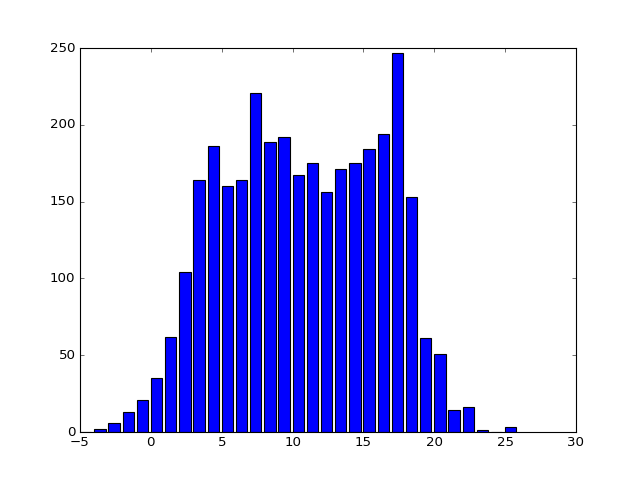

In [66]:
import matplotlib.pyplot as plt
plt.bar(tempBuckets, numCrimesbyTemp)
plt.show()
## What is wrong with this picture? What else should we do to our number of crimes by temperature to make this
## information more relevant?

In [ ]:
numDaysbyTemp = [0 for temp in tempBuckets]


In [54]:
import statsmodels.api as sm